In [1]:
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
dataset_path=r"E:\CProject2021\Data"

In [3]:
INIT_LR=1e-3
EPOCHS=10
BS=8

In [4]:
args={}
args["dataset"]=dataset_path

In [5]:
args

{'dataset': 'E:\\CProject2021\\Data'}

In [6]:
import cv2
import numpy as np
import os
from imutils import paths
iPaths=list(paths.list_images(args["dataset"]))
data=[]
labels=[]
i=1
for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
data=np.array(data)/255.0
labels=np.array(labels)

In [7]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [8]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [9]:
#LabelEncoding
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( data, labels, test_size=0.20, random_state=42,stratify=labels)

In [11]:
#creating more images for training
trainAug=ImageDataGenerator(rotation_range=15,fill_mode="nearest") 

In [12]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel=bModel.output
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)  #prevent from overfitting
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

C:\Users\alfo7\anaconda3\envs\dl\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


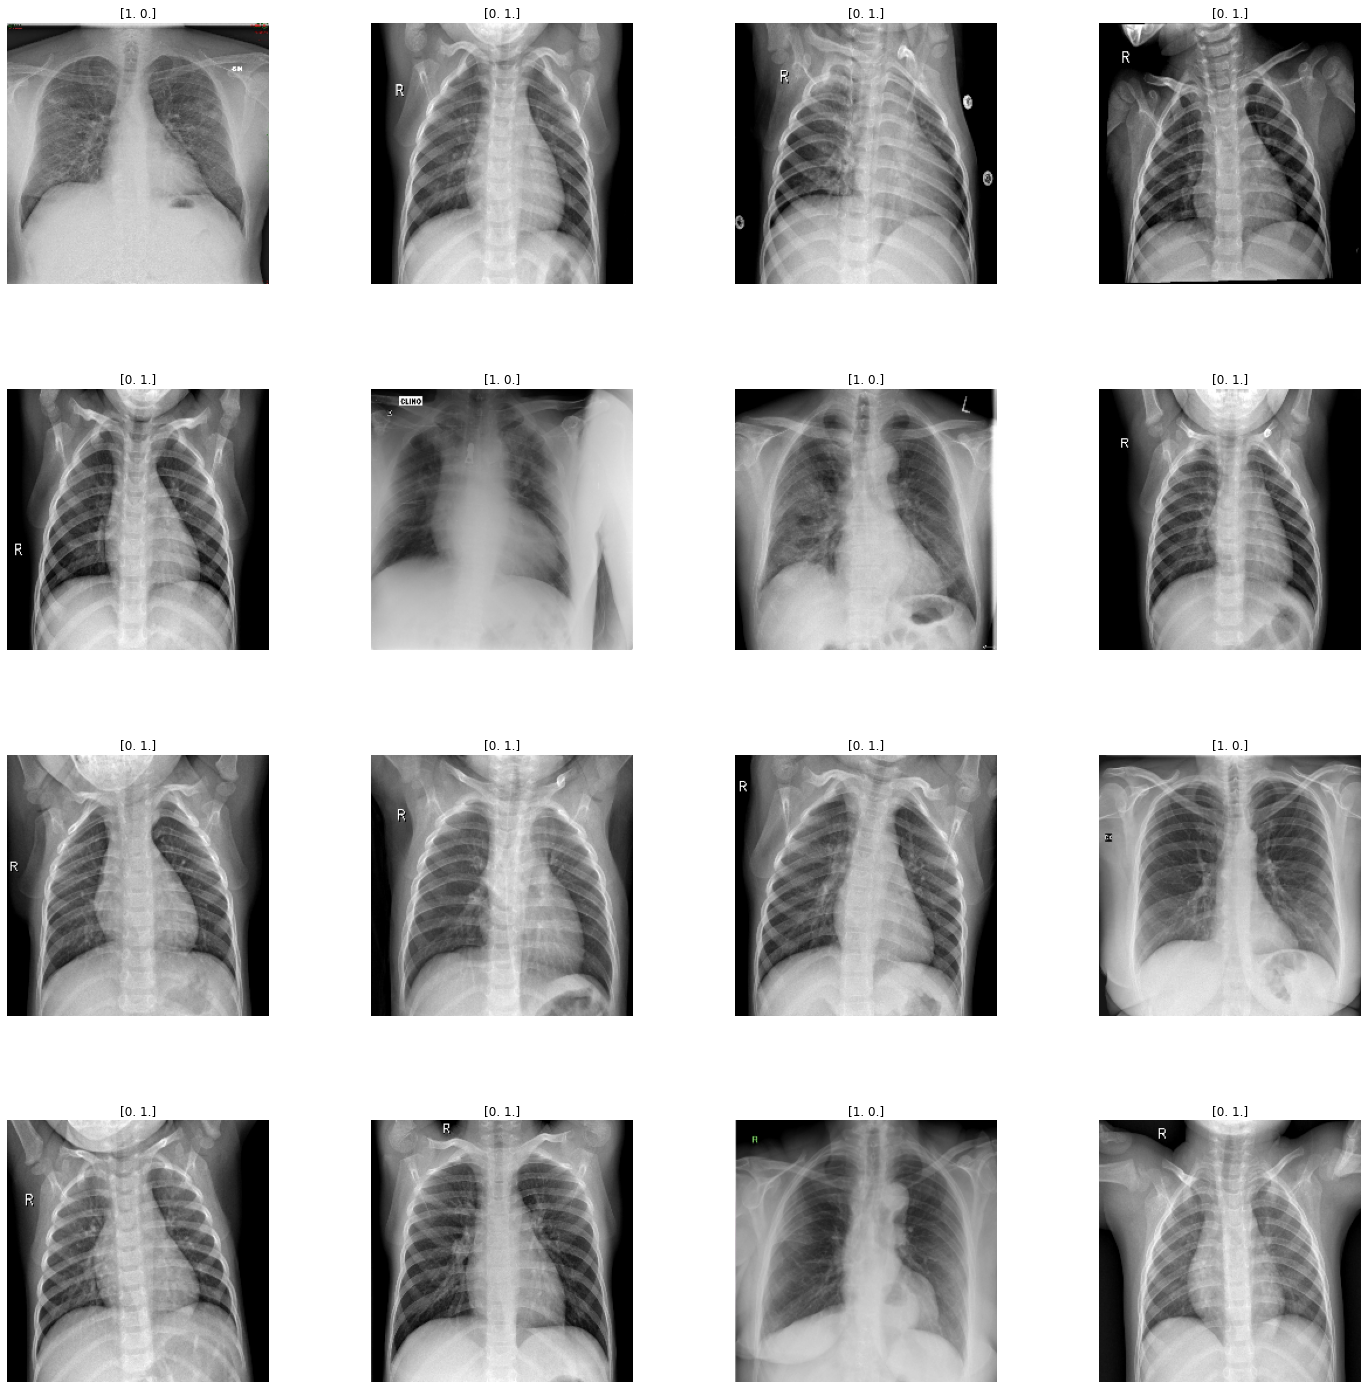

In [14]:
Wid_grid = 4 #width
Len_grid = 4 #lenth
fig, axes = plt.subplots(Len_grid, Wid_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, Len_grid * Wid_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Training 

In [15]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 2s 94ms/step - loss: 0.7326 - accuracy: 0.6250 - val_loss: 0.5301 - val_accuracy: 0.7250
Epoch 2/10
20/20 [==============================] - 2s 84ms/step - loss: 0.6133 - accuracy: 0.6625 - val_loss: 0.4002 - val_accuracy: 0.9000
Epoch 3/10
20/20 [==============================] - 2s 83ms/step - loss: 0.3931 - accuracy: 0.8375 - val_loss: 0.3430 - val_accuracy: 0.8750
Epoch 4/10
20/20 [==============================] - 2s 83ms/step - loss: 0.3150 - accuracy: 0.9062 - val_loss: 0.2719 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 2s 84ms/step - loss: 0.2473 - accuracy: 0.9375 - val_loss: 0.2292 - val_accuracy: 0.9500
Epoch 6/10
20/20 [==============================] - 2s 83ms/step - loss: 0.1956 - accuracy: 0.9750 - val_loss: 0.1919 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 2s 83ms/s

# Testing 

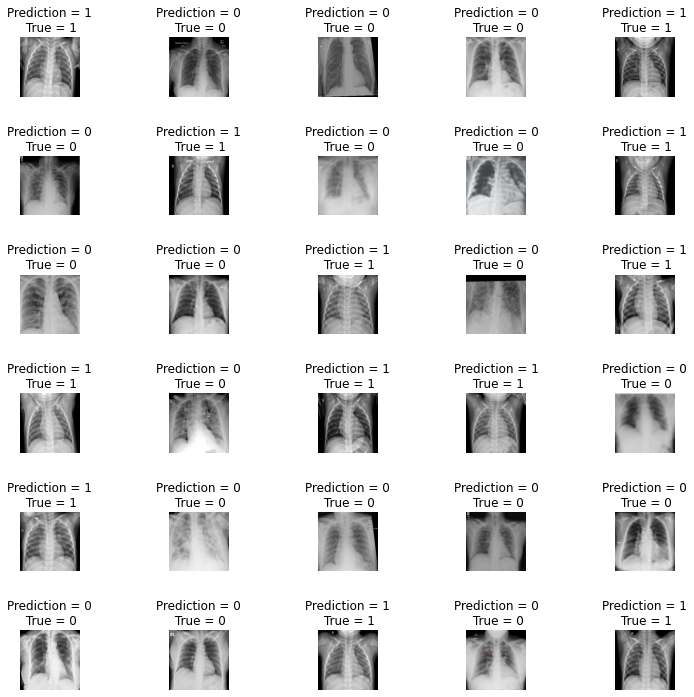

In [16]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1, hspace=1)

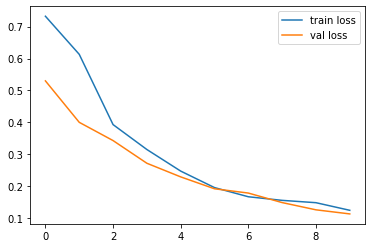

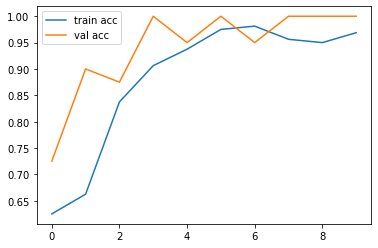

In [17]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
model.save("covidModel.h5")

In [19]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('covidModel.h5')
from keras.applications.vgg16 import preprocess_input

Prediction: Normal


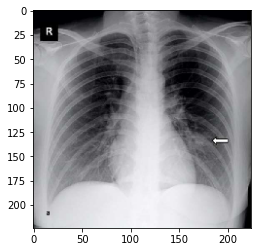

In [26]:
img = image.load_img('Data/Covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')

# Analysis

NORMAL Chest X-ray Vs COVID-19 Chest X-ray


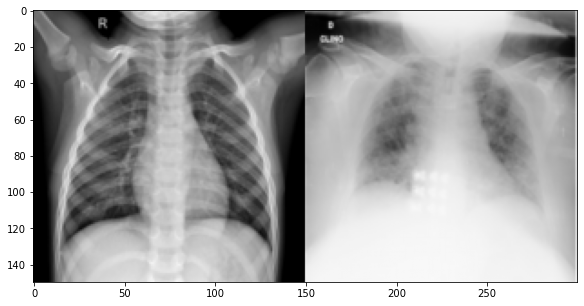

NORMAL Chest X-ray Vs COVID-19 Chest X-ray


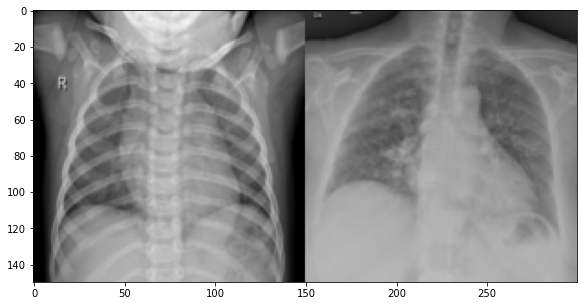

NORMAL Chest X-ray Vs COVID-19 Chest X-ray


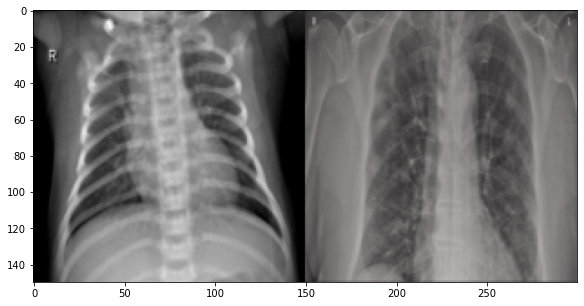

NORMAL Chest X-ray Vs COVID-19 Chest X-ray


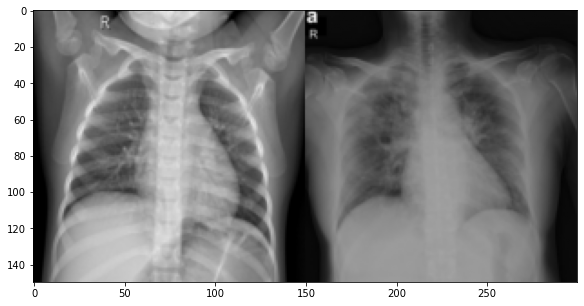

NORMAL Chest X-ray Vs COVID-19 Chest X-ray


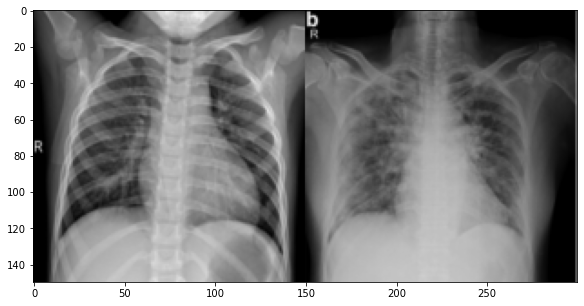

In [44]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
Data_Dir = dataset_path+"//"
Cimages = os.listdir(Data_Dir+"Covid")
Nimages = os.listdir(Data_Dir+"Normal")

def plotter(i):
    normal = cv2.imread(Data_Dir+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(Data_Dir+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("NORMAL Chest X-ray Vs COVID-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)